# Pandas

paandas is a python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in python.

pandas build upon numpy and scipy providing easy-to-use data structures and data manipulation functions with integrated inddexing.

The main data structures pandas provides are Series and DataFrames. After a brief introduction to these two data structures and data ingestion, the key features of pandas this notebook covers are

* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

## Additional Recommended Resources:

* pandas Documentation http://pandas.pydata.org/pandas-docs/stable/
* Python for Data Analysis by Wes McKinney
* Python Data Science Handbook by Jake VanerPlas


## Import Libraries

In [1]:
import pandas as pd

## Introduction to pandas Data Structures

pandas has two main data structures it uses namely, Series and DataFrames

## pandas Series

pandas Series one-dimensional labeled array

In [2]:
ser = pd.Series(data = [100, 'foo', 300, 'bar', 500], index=['tom', 'bob','nancy', 'dan', 'eric'] )

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser.loc[['nancy', 'bob']]

nancy    300
bob      foo
dtype: object

In [6]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [7]:
ser.iloc[2]

300

In [8]:
'bob' in ser

True

In [9]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [10]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

## pandas DataFrame

pandas DataFrame is a 2-dimensional labeled data structure.

## Create DataFrame from dictionary of Python Series

In [11]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']), 
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cereal', 'dancy'])}

In [12]:
df = pd.DataFrame(d)
df
#print(df)

,one,two
apple,100.0,111.0
ball,200.0,222.0
cereal,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [13]:
df.index

Index(['apple', 'ball', 'cereal', 'clock', 'dancy'], dtype='object')

In [14]:
df.columns

Index(['one', 'two'], dtype='object')

In [15]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [16]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


## Create DataFrame from list of Python dictionaries

In [17]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [18]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [19]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [20]:
pd.DataFrame(data, columns=['joe', 'dora', 'alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


## Basic DataFrame operations

In [21]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cereal,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [22]:
df['one']

apple     100.0
ball      200.0
cereal      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [23]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cereal,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [24]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cereal,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [25]:
three = df.pop('three')

In [26]:
three

apple     11100.0
ball      44400.0
cereal        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [27]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cereal,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [28]:
del df['two']

In [29]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cereal,NaN,False
clock,300.0,True
dancy,NaN,False


In [30]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cereal,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [31]:
df['one_upper_half' ] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cereal,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


## Case Study: Movie Data Analysis

This notebook uses a dataset from the MovieLens website. We will describe the dataset as we explore with it using pandas. Please note that it is already available in the folder for week-4 so you dont need to download the dataset, but here are the links to the data source and location.

* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Let us look at the files in this dataset using the Unix command ls (I did it on Git Bash)

## Use Pandas to Read the Dataset

In this notebook, we will be using three CSV files:
* **ratings.csv:** userid,movieid,rating,timestamp
* **tags.csv: ** userid,moveid, tag, timestamp
* **movies.csv: ** movieid,title,genres

Using the read.csv function in pandas, we will ingest these three files

In [32]:
movies = pd.read_csv('./downloads/ml-20m/ml-20m/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [35]:
# Timestams represent seconds since midnight Coordinated Universal Time(UTC)

tags = pd.read_csv('./downloads/ml-20m/ml-20m/tags.csv', sep=',')
tags.head()


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [36]:
ratings = pd.read_csv('./downloads/ml-20m/ml-20m/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [37]:
# For current analysis, we will remove the timestamp(we will come back to it)

del ratings['timestamp']
del tags['timestamp']

## Data Structures

### Series

In [38]:
# Extract 0th row: notice that it is infact a series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [39]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [40]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [41]:
row_0['userId']

18

In [42]:
'rating' in row_0

False

In [43]:
row_0.name

0

In [44]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

## DataFrames

In [45]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [46]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [47]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [48]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ] 

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


## Descriptive Statistics

Look how the ratings are distributed

In [49]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [50]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [51]:
ratings['rating'].mean()

3.5255285642993797

In [52]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [53]:
ratings['rating'].min()

0.5

In [54]:
ratings['rating'].max()

5.0

In [55]:
ratings['rating'].std()

1.051988919275684

In [56]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [57]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [58]:
filter_1 = ratings['rating'] > 5
print(filter_1)
#filter_1.any()

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248    False
20000249    False
20000250    False
20000251    False
20000252    False
20000253    False
20000254    False
20000255    False
20000256    False
20000257  

In [59]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

## Data Cleaning: Handling Missing Data

In [60]:
movies.shape

(27278, 3)

In [61]:
# is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

No NULL values

In [62]:
ratings.shape

(20000263, 3)

In [63]:
# is any row NULL?
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

NO Null Values

In [64]:
tags.shape

(465564, 3)

In [65]:
# is any row NULL?
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

Some tags are NUll

In [66]:
# Drops Null Values
tags = tags.dropna()

In [67]:
# Checks again is any row Null?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [68]:
tags.shape

(465548, 3)

No more null values note that number of lines have reduced 

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015881BBEEB8>]], dtype=object)

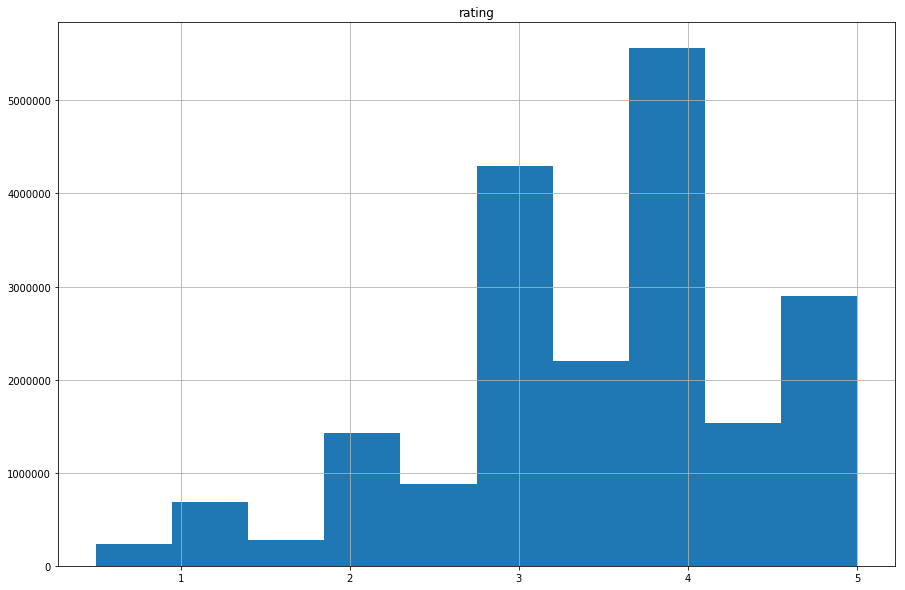

In [70]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

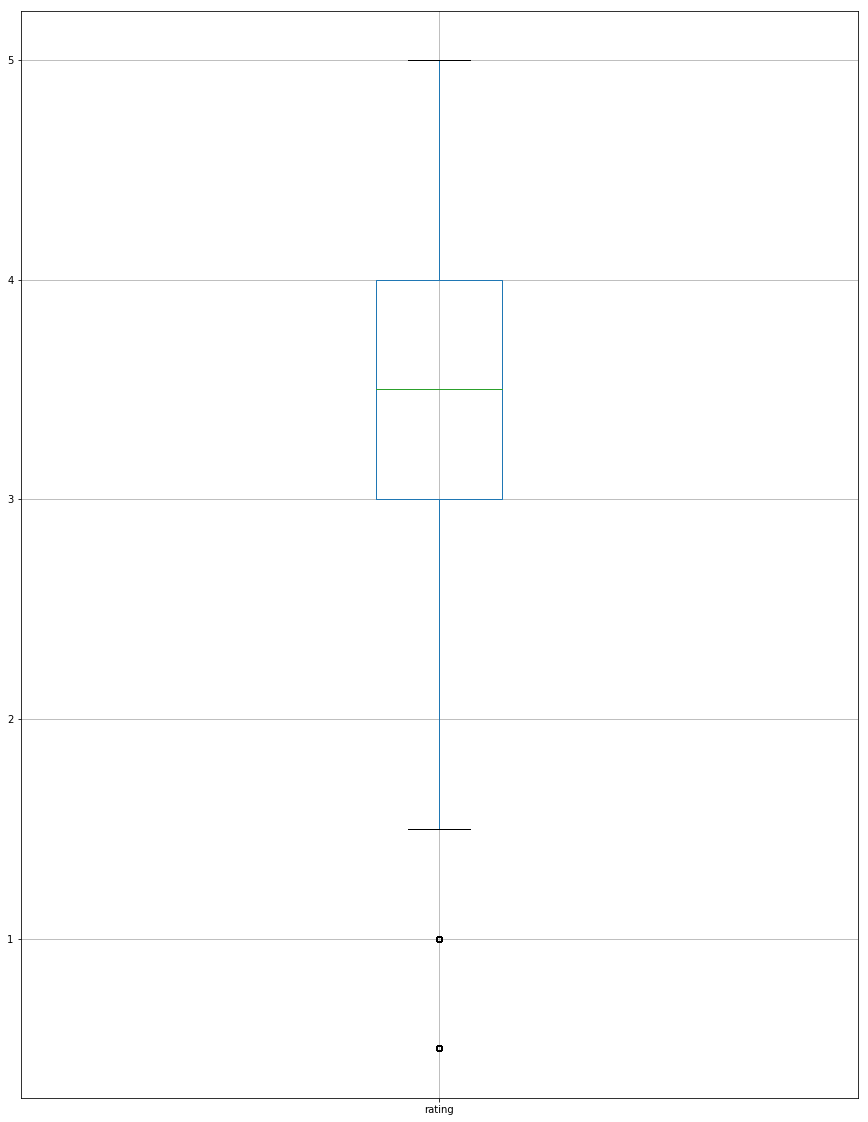

In [71]:
ratings.boxplot(column='rating', figsize=(15,20))

## Slicing Out Columns

In [72]:
tags[ 'tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [74]:
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [77]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [82]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

Eric Fleming                           1
going home                             1
fellini                                1
ReykjavÃ­k                             1
R:sexual content including dialogue    1
lataappa                               1
Oscar:Best Picture                     1
Reese Witherspoons jaw                 1
Rwanda Genocide                        1
too stupid to remember                 1
Name: tag, dtype: int64

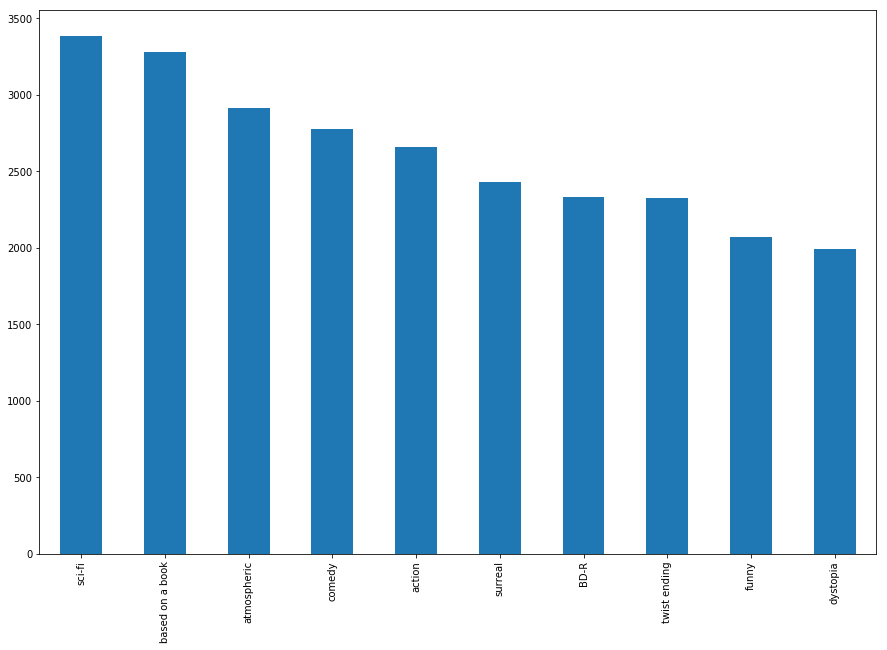

In [83]:
tag_counts[:10].plot(kind='bar',figsize=(15,10))

## Filters for Selecting Rows

In [85]:
is_highly_rated = ratings['rating'] >=4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating
68,1,2021,4.0
69,1,2100,4.0
70,1,2118,4.0
71,1,2138,4.0
72,1,2140,4.0
73,1,2143,4.0
74,1,2173,4.0
75,1,2174,4.0
76,1,2193,4.0
79,1,2288,4.0


In [86]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [87]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


## Group By and Aggregate

In [152]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [153]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [154]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [155]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


## Merge Dataframes

In [156]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [157]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [158]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,year,userId,tag,timestamp,parsed_time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1644,Watched,1417736680,2014-12-04 23:44:40
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1741,computer animation,1183903155,2007-07-08 13:59:15
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1741,Disney animated feature,1183933307,2007-07-08 22:21:47
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1741,Pixar animation,1183934770,2007-07-08 22:46:10
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1741,TÃ©a Leoni does not star in this movie,1245093573,2009-06-15 19:19:33


More examples http://pandas.pydata.org/pandas-docs/stable/merging.html

## Combine aggreagation, merging, and filters to get useful analytics

In [159]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [160]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,year,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,2007,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,4.0
26741,131258,The Pirates (2014),Adventure,2014,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),2001,3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,4.0


In [161]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,year,rating
26737,131250,No More School (2000),Comedy,2000,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,2001,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,2007,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,4.0


In [162]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592
6,7,Sabrina (1995),Comedy|Romance,1995,3.366484


In [163]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,year,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,2006,4.0
26737,131250,No More School (2000),Comedy,2000,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,2001,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,2007,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,4.0


# Vectorized String Operationns

In [164]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


## Split 'genres' into multiple columns

In [165]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [166]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


## Add a new column for comedy genre flag

In [167]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [168]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


## Extract year from title e.g. (1995)

In [169]:
movies['year'] = movies['title'].str.extract('.\((.*)\).*', expand=True)

In [170]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


# More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods

## Parsing Timestamps

Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps!

In [171]:
tags = pd.read_csv('./downloads/ml-20m/ml-20m/tags.csv' , sep=',')

In [172]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

## Unix time / POSIX time / epoch time records time in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [173]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [174]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

## Data Type datetime64[ns] maps to either M8[ns] depending on the hardware

In [175]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [176]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


## Selecting rows based on timestamps

In [177]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]
tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

## Sorting the table using the timestamps

In [178]:
 tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


# Average Movie Ratings over Time

## Are Movie ratings related to the year of launch?

In [179]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [180]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [181]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,Yu long gong wu) (1991,2.500000
1,'A' gai waak) (1983,3.543956
2,'A' gai wak juk jap) (1987,3.538462
3,"'Je vous salue, Marie') (1985",3.035714
4,(Entlastungen) Pipilottis Fehler) (1988,1.000000
5,...Altrimenti ci arrabbiamo!) (1974,3.833333
6,06) (1994,3.403361
7,06/05) (2004,2.500000
8,1-2-3-4 ou Les Collants noirs) (1960,2.500000
9,10 minuta) (2002,2.500000


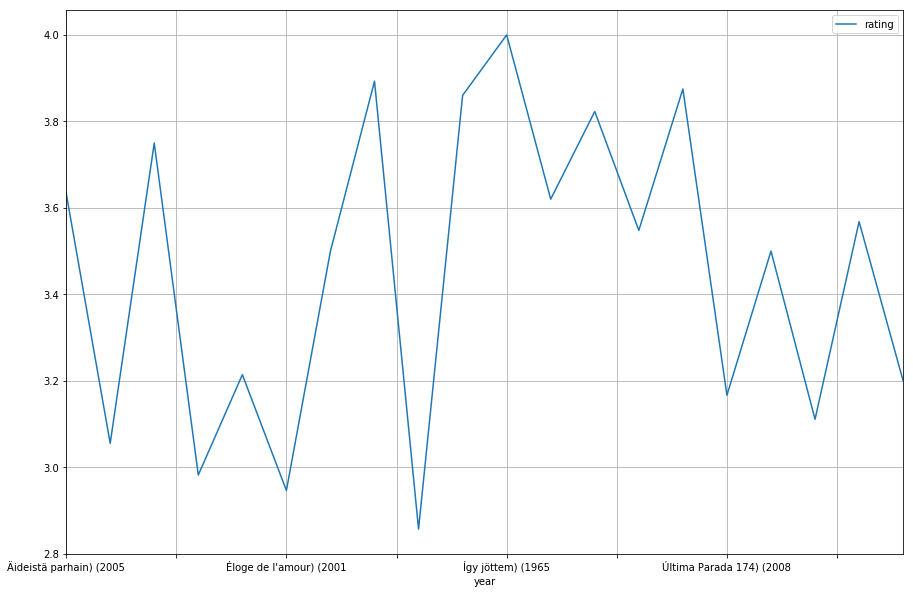

In [182]:
yearly_average[-20:].plot(x='year', y='rating' ,figsize=(15,10), grid=True)